# Practical Exam: Supermarket Loyalty

International Essentials is an international supermarket chain.

Shoppers at their supermarkets can sign up for a loyalty program that provides rewards each year to customers based on their spending. The more you spend the bigger the rewards. 

The supermarket would like to be able to predict the likely amount customers in the program will spend, so they can estimate the cost of the rewards. 

This will help them to predict the likely profit at the end of the year.

## Data

The dataset contains records of customers for their last full year of the loyalty program.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|customer_id | Unique identifier for the customer. </br>Missing values are not possible due to the database structure. |
|spend | Continuous. </br>The total spend of the customer in their last full year. This can be any positive value to two decimal places. </br>Missing values should be replaced with 0. |
|first_month | Continuous. </br>The amount spent by the customer in their first month of the year. This can be any positive value, rounded to two decimal places. </br>Missing values should be replaced with 0. |
| items_in_first_month | Discrete. </br>The number of items purchased in the first month. Any integer value greater than or equal to zero. </br>Missing values should be replaced by 0. |  
| region | Nominal. </br>The geographic region that the customer is based in. One of four values Americas, Asia/Pacific, Europe, Middle East/Africa. </br>Missing values should be replaced with "Unknown". |
| loyalty_years | Oridinal. </br>The number of years the customer has been a part of the loyalty program. One of five ordered categories, '0-1', '1-3', '3-5', '5-10', '10+'. </br>Missing values should be replaced with '0-1'.|
| joining_month | Nominal. </br>The month the customer joined the loyalty program. One of 12 values "Jan", "Feb", "Mar", "Apr", etc. </br>Missing values should be replaced with "Unknown".|
| promotion | Nominal. </br>Did the customer join the loyalty program as part of a promotion? Either 'Yes' or 'No'. </br>Missing values should be replaced with 'No'.|


# Task 1

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "loyalty.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
|customer_id | Unique identifier for the customer. </br>Missing values are not possible due to the database structure. |
|spend | Continuous. </br>The total spend of the customer in their last full year. This can be any positive value to two decimal places. </br>Missing values should be replaced with 0. |
|first_month | Continuous. </br>The amount spent by the customer in their first month of the year. This can be any positive value, rounded to two decimal places. </br>Missing values should be replaced with 0. |
| items_in_first_month | Discrete. </br>The number of items purchased in the first month. Any integer value greater than or equal to zero. </br>Missing values should be replaced by 0. |  
| region | Nominal. </br>The geographic region that the customer is based in. One of four values Americas, Asia/Pacific, Europe, Middle East/Africa. </br>Missing values should be replaced with "Unknown". |
| loyalty_years | Oridinal. </br>The number of years the customer has been a part of the loyalty program. One of five ordered categories, '0-1', '1-3', '3-5', '5-10', '10+'. </br>Missing values should be replaced with '0-1'.|
| joining_month | Nominal. </br>The month the customer joined the loyalty program. One of 12 values "Jan", "Feb", "Mar", "Apr", etc. </br>Missing values should be replaced with "Unknown".|
| promotion | Nominal. </br>Did the customer join the loyalty program as part of a promotion? Either 'Yes' or 'No'. </br>Missing values should be replaced with 'No'.|

In [437]:
##import relevant modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [438]:
## read in the supermarket loyalty data set
loyalty_data = pd.read_csv('loyalty.csv')

## preview the data
loyalty_data.head()

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.3,5,Asia/Pacific,5-10,Nov,No
1,2,106.45,16.2,14,Asia/Pacific,0-1,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes


In [439]:
## inspect the loyalty data
loyalty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           1246 non-null   int64  
 1   spend                 1246 non-null   float64
 2   first_month           1246 non-null   object 
 3   items_in_first_month  1246 non-null   int64  
 4   region                1246 non-null   object 
 5   loyalty_years         1246 non-null   object 
 6   joining_month         1121 non-null   object 
 7   promotion             1246 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 78.0+ KB


In [440]:
## inspect object data types
loyalty_data.describe(include='object')

,first_month,region,loyalty_years,joining_month,promotion
count,1246,1246,1246,1121,1246
unique,491,4,5,12,4
top,.,Middle East/Africa,0-1,Jan,No
freq,125,326,382,146,572


In [441]:
## check for missing data
loyalty_data.isna().sum()

customer_id               0
spend                     0
first_month               0
items_in_first_month      0
region                    0
loyalty_years             0
joining_month           125
promotion                 0
dtype: int64

In [442]:
## check the data for inconsitencies in labels or other forms of missing data
print(loyalty_data['items_in_first_month'].unique())
print(loyalty_data['promotion'].unique())
print(loyalty_data['region'].unique())
print(loyalty_data['loyalty_years'].unique())
print(loyalty_data['joining_month'].unique())


[ 5 14  7  8 13  9  6 12 11 10 15]
['No' 'Yes' 'NO' 'YES']
['Asia/Pacific' 'Middle East/Africa' 'Europe' 'Americas']
['5-10' '0-1' '10+' '3-5' '1-3']
['Nov' 'Feb' 'Dec' 'Apr' 'May' nan 'Jul' 'Oct' 'Jan' 'Sep' 'Mar' 'Jun'
 'Aug']


In [443]:
## replace missing values in 'loyalty_years' with Unknown
loyalty_data['joining_month'].fillna('Unknown', inplace=True)

## Many values in 'first month' are the string '.' instead of '0' 
## replace '.' values in 'first_month' with 0 and convert to float
## only replacing strings that exactly match '.' to avoid replacing the decimal point
## in existing numeric values
loyalty_data['first_month']=[0 if value == '.' else value 
                             for value in loyalty_data['first_month']]

#loyalty_data['first_month'] = loyalty_data['first_month'].str.replace('.','0')
loyalty_data['first_month'] = loyalty_data['first_month'].astype('float')


## round continuous columns to two decimal places
float_vars = ['spend','first_month']
loyalty_data[float_vars] = loyalty_data[float_vars].round(decimals=2)

## change YES/NO values to sentence casing in 'promotion'
loyalty_data['promotion'] = loyalty_data['promotion'].str.capitalize()

## convert nominal columns to categorical data type
cat_vars = ['loyalty_years','region','joining_month','promotion']
loyalty_data[cat_vars] = loyalty_data[cat_vars].astype('category')

## convert 'loyalty_years' to ordinal
loyalty_data['loyalty_years'].cat.reorder_categories(
    new_categories = ['0-1','1-3','3-5','5-10','10+'],
    ordered = True,
    inplace = True
)
clean_data = loyalty_data

## preview the data again
clean_data.head()


,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.30,5,Asia/Pacific,5-10,Nov,No
1,2,106.45,16.20,14,Asia/Pacific,0-1,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes


In [444]:
## inspect the cleaned loyalty data
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   customer_id           1246 non-null   int64   
 1   spend                 1246 non-null   float64 
 2   first_month           1246 non-null   float64 
 3   items_in_first_month  1246 non-null   int64   
 4   region                1246 non-null   category
 5   loyalty_years         1246 non-null   category
 6   joining_month         1246 non-null   category
 7   promotion             1246 non-null   category
dtypes: category(4), float64(2), int64(2)
memory usage: 45.1 KB


# Task 2 

The team at International Essentials have told you that they have always believed that the number of years in the loyalty scheme is the biggest driver of spend. 

Producing a table showing the difference in the average spend by number of years in the loyalty programme along with the variance to investigate this question for the team.

 - You should start with the data in the file 'loyalty.csv'.

 - Your output should be a data frame named `spend_by_years`. 

 - It should include the three columns `loyalty_years`, `avg_spend`, `var_spend`. 

 - Your answers should be rounded to 2 decimal places.   

In [445]:
## reload the unedited 'loyalty.csv' as per the instructions of the task
loyalty = pd.read_csv('loyalty.csv')

## group the data by 'loyalty_years' and compute the mean and variance of 'spend'
spend_by_years = loyalty.groupby('loyalty_years')['spend'].agg(['mean','var'])

## rename columns
spend_by_years.columns = ['avg_spend','var_spend']

## round columns to two decimal places
spend_by_years = spend_by_years.round(decimals=2)
spend_by_years

,avg_spend,var_spend
loyalty_years,,
0-1,110.56,9.30
1-3,129.31,9.65
10+,117.41,16.72
3-5,124.55,11.09
5-10,135.15,14.10


# Task 3

Fit a baseline model to predict the spend over the year for each customer.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “test.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `customer_id` and `spend`. The `spend` column must be your predicted values.

In [447]:
## load in train data
train_data = pd.read_csv('train.csv')
train_data.head()


,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,135.39,15.44,10,Middle East/Africa,5-10,Feb,Yes
1,2,129.74,20.12,12,Europe,10+,Jun,No
2,3,138.61,18.38,5,Middle East/Africa,5-10,Oct,No
3,4,129.94,20.13,5,Asia/Pacific,10+,Sep,No
4,6,77.56,23.04,10,Europe,1-3,May,No


In [448]:
## load in test_data
test_data = pd.read_csv('test.csv')
test_data.head()

,customer_id,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,5,20.43,8,Europe,5-10,Jul,Yes
1,7,20.90,7,Americas,3-5,Jul,No
2,16,19.99,7,Asia/Pacific,5-10,Jul,Yes
3,17,23.55,13,Middle East/Africa,3-5,Aug,No
4,19,25.85,11,Europe,3-5,Apr,Yes


In [449]:
## object data types need to be converted to numerical values

train_data = pd.get_dummies(data=train_data,
                            columns=['loyalty_years','region','joining_month','promotion'],
                            drop_first=True)
train_data.head()

,customer_id,spend,first_month,items_in_first_month,loyalty_years_1-3,loyalty_years_10+,loyalty_years_3-5,loyalty_years_5-10,region_Asia/Pacific,region_Europe,region_Middle East/Africa,joining_month_Aug,joining_month_Dec,joining_month_Feb,joining_month_Jan,joining_month_Jul,joining_month_Jun,joining_month_Mar,joining_month_May,joining_month_Nov,joining_month_Oct,joining_month_Sep,promotion_Yes
0,1,135.39,15.44,10,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,2,129.74,20.12,12,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,138.61,18.38,5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
3,4,129.94,20.13,5,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,6,77.56,23.04,10,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [450]:
## convert the test data types as well

test_data = pd.get_dummies(data=test_data,
                           columns=['loyalty_years','region','joining_month','promotion'],
                           drop_first=True)
test_data.head()


,customer_id,first_month,items_in_first_month,loyalty_years_1-3,loyalty_years_10+,loyalty_years_3-5,loyalty_years_5-10,region_Asia/Pacific,region_Europe,region_Middle East/Africa,joining_month_Aug,joining_month_Dec,joining_month_Feb,joining_month_Jan,joining_month_Jul,joining_month_Jun,joining_month_Mar,joining_month_May,joining_month_Nov,joining_month_Oct,joining_month_Sep,promotion_Yes
0,5,20.43,8,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,7,20.90,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,16,19.99,7,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,17,23.55,13,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
4,19,25.85,11,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [451]:
## import the relevant machine learning moduels
import sklearn
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline



In [452]:
## split the data and scale the numeric columns

## separate the data into target and feature variables
## 'customer_id' is dropped from the data set as this unique identifier will not help the model
X = train_data.drop(['customer_id','spend'],axis=1)
y = train_data['spend']

## split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=10)

## initialize a scaler and scale the numeric variables
scaler = StandardScaler()

numeric_vars = ['first_month','items_in_first_month']

X_train[numeric_vars] = scaler.fit_transform(X_train[numeric_vars])
X_test[numeric_vars] = scaler.fit_transform(X_test[numeric_vars])

X_train.head()

,first_month,items_in_first_month,loyalty_years_1-3,loyalty_years_10+,loyalty_years_3-5,loyalty_years_5-10,region_Asia/Pacific,region_Europe,region_Middle East/Africa,joining_month_Aug,joining_month_Dec,joining_month_Feb,joining_month_Jan,joining_month_Jul,joining_month_Jun,joining_month_Mar,joining_month_May,joining_month_Nov,joining_month_Oct,joining_month_Sep,promotion_Yes
426,-0.557514,1.504448,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
240,-0.808288,0.272093,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
590,1.007413,-0.035995,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
600,-0.895094,0.272093,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
448,-0.526167,1.504448,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [453]:
## For the baseline model, let's use a linear regression model without using feature selection to
## determine the optimal number of features to keep in the model.

## Instantiate and fit a linear model
base_lm = LinearRegression()
base_lm.fit(X_train,y_train)

## 
y_pred_base = base_lm.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred_base,squared=False)
print(RMSE)

0.32261164533087217


In [454]:
## make predictions based on the data from the test.csv
test_data[numeric_vars] = scaler.fit_transform(test_data[numeric_vars])
test_data_only = test_data.drop('customer_id',axis=1)

test_pred = base_lm.predict(test_data_only)

base_result = pd.DataFrame({
    'customer_id':test_data['customer_id'],
    'spend':test_pred
})
base_result.head()

,customer_id,spend
0,5,140.676979
1,7,148.752743
2,16,140.833791
3,17,150.734374
4,19,153.654038


# Task 4

Fit a comparison model to predict the spend over the year for each customer.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “test.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `customer_id` and `spend`. The `spend` column must be your predicted values.

In [455]:
# Use this cell to write your code for Task 4

## Instantiate a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

## We'll use Recursive Feature elimination to preform feature selection, using cross-validation
## to determine the optimal number of features to keep.

## This will create an integer array to store the values I will test during cross-validation.
total_features = len(X_train.columns)
hyper_parameters = [{'n_features_to_select': list(range(1, total_features))}]

In [456]:
## Instantiate a linear regression model and fit it to the training data
tuned_lm = LinearRegression()
tuned_lm.fit(X_train,y_train)

rfe = RFE(tuned_lm)

model_cv = GridSearchCV(estimator=rfe,
                        param_grid=hyper_parameters,
                        scoring='neg_mean_squared_error',
                        cv=folds,
                        return_train_score=True
                        )

## fit the cross-validation model
model_cv.fit(X_train,y_train)

## store the results of the cross-validation
cv_results = pd.DataFrame(model_cv.cv_results_)

## what number of features resulted in the best scoring model
model_cv.best_params_




{'n_features_to_select': 18}

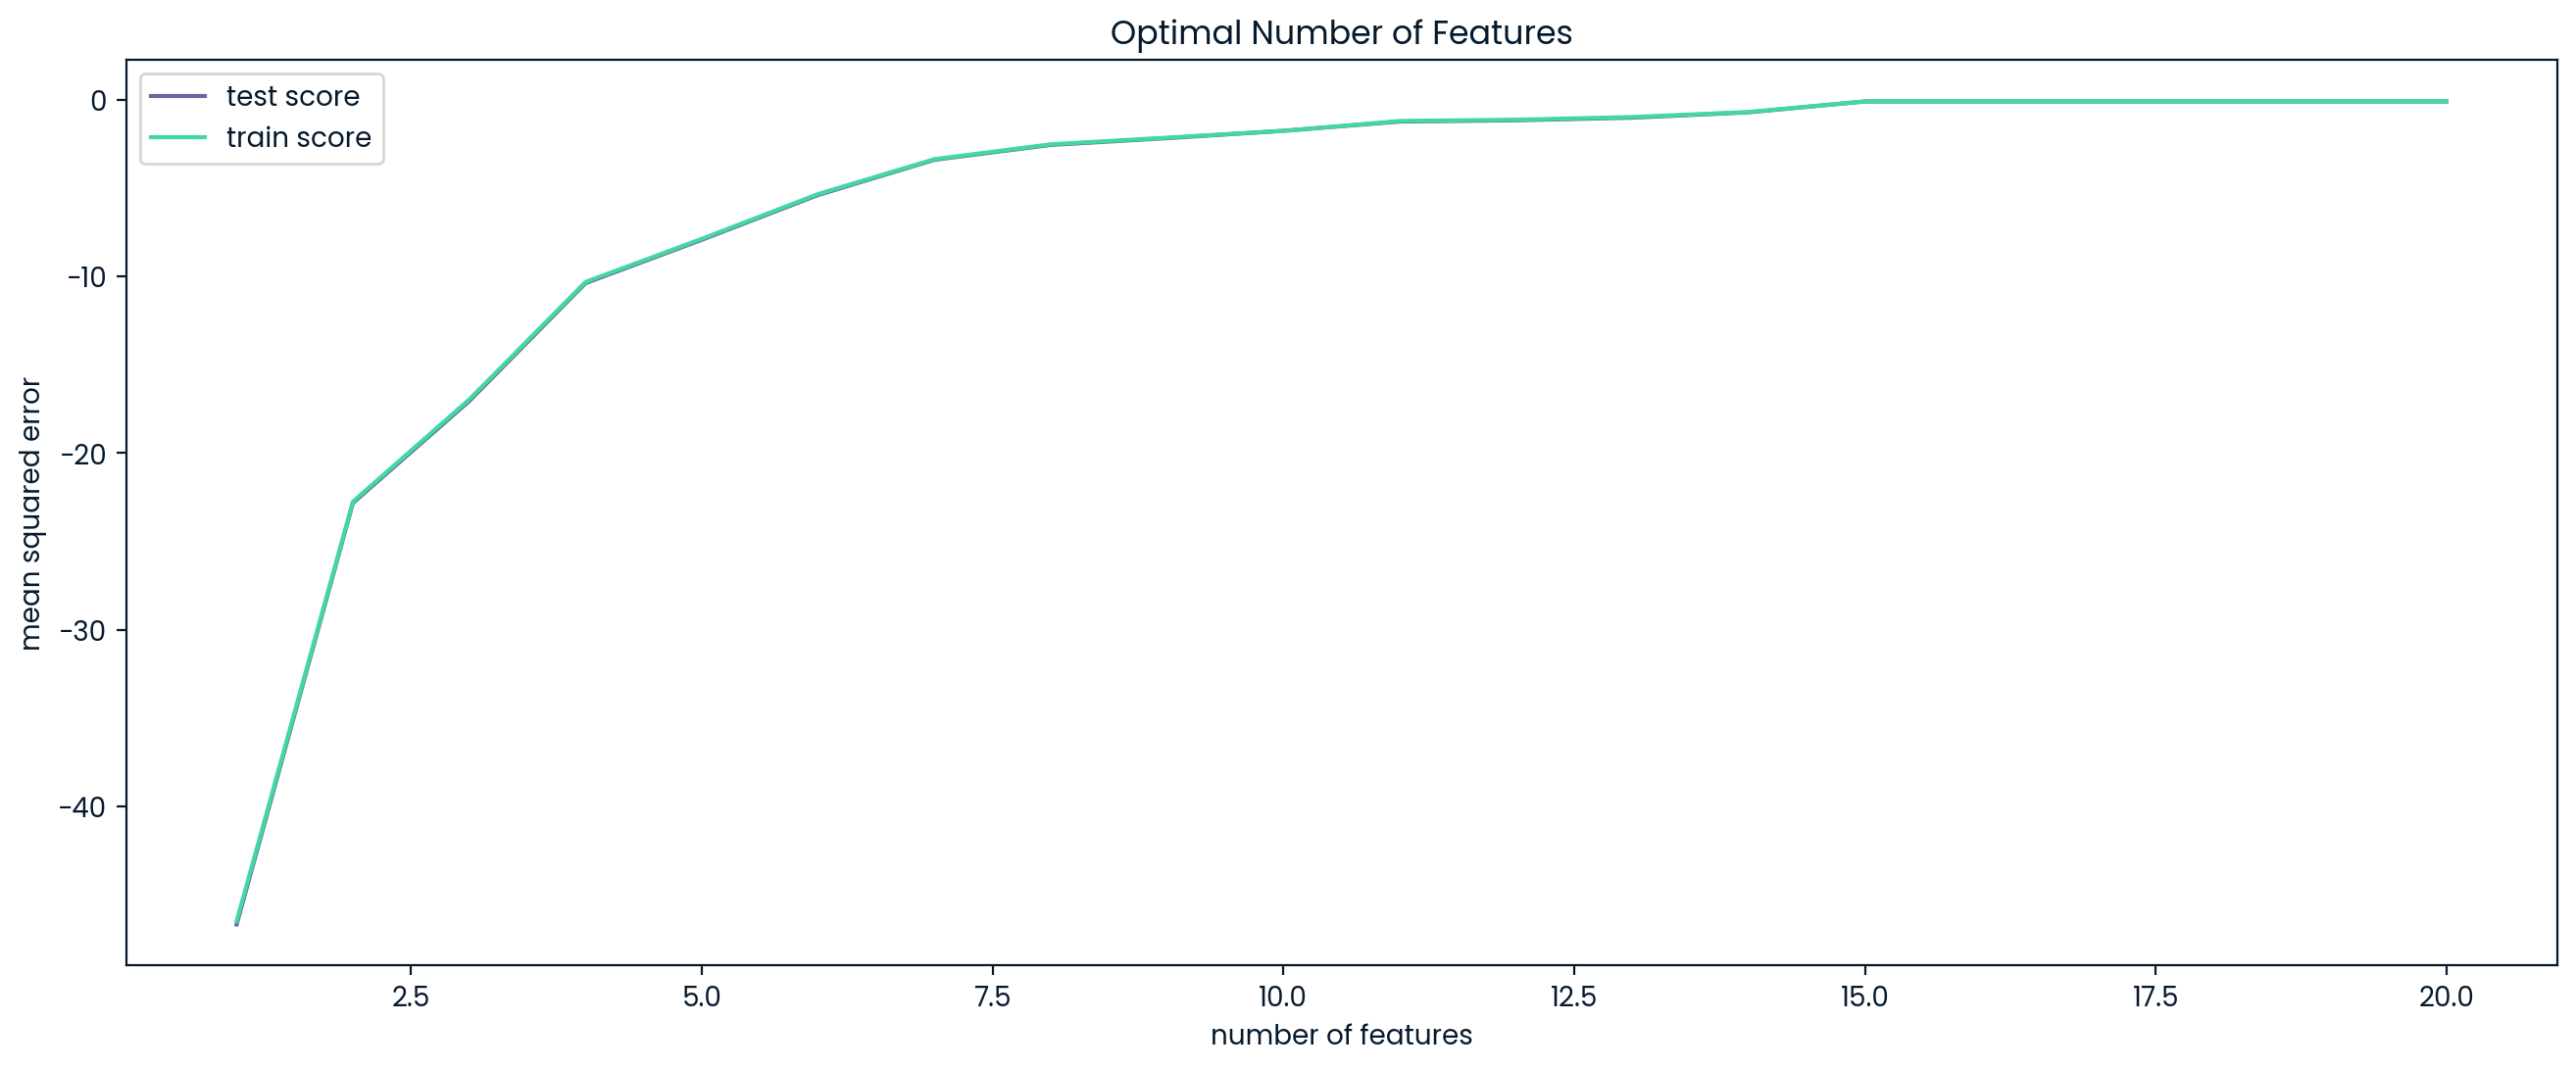

In [457]:
## plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('mean squared error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [458]:
## One of the requirements for this project was that the final model must have a Root Mean Squared
## Error below 0.35

## The above cross-validation revealed that the optimal number of features to keep in the final
## model is 18 features.

## Running the final model
n_features_optimal = 18

tuned_lm = LinearRegression()
tuned_lm.fit(X_train, y_train)

rfe = RFE(tuned_lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

## predict prices of X_test
y_pred = rfe.predict(X_test)
RMSE = mean_squared_error(y_test, y_pred,squared=False)
print(RMSE)


0.3231650449402251


In [459]:
## make predictions based on the data from the test.csv
test_data[numeric_vars] = scaler.fit_transform(test_data[numeric_vars])
test_data_only = test_data.drop('customer_id',axis=1)

test_pred = rfe.predict(test_data_only)

compare_result = pd.DataFrame({
    'customer_id':test_data['customer_id'],
    'spend':test_pred
})
compare_result.head()

,customer_id,spend
0,5,140.690597
1,7,148.748406
2,16,140.834943
3,17,150.741076
4,19,153.664310
